In [1]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,Dense, Bidirectional, LSTM,TimeDistributed
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation data directories
train_dir = "C:/Users/malho/OneDrive/Desktop/ML/Alzheimer_s Dataset/train"
test_dir = "C:/Users/malho/OneDrive/Desktop/ML/Alzheimer_s Dataset/test"

# Set image dimensions (replace with your image size)
img_width, img_height = 150, 150

# Use data generators to load images and labels (modify for your data structure)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
class_len = 4
from tensorflow.keras.layers import Reshape
import time

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data generators (already provided)
# ... your data generator code here ...

# Define image dimensions
img_width, img_height = 150, 150

# Define CNN model
model = Sequential([
  # Input layer for the image (replace channels with your data's format)
  keras.layers.Input(shape=(img_height, img_width, 3)),

  # Feature extraction with CNN blocks
  Conv2D(16, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),

  # Flatten the features before dense layers
  Flatten(),
  
  # Dense layers with activation for classification (adapt class_len to your data)
  Dense(128, activation='relu'),
  Dense(class_len, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [5]:
time_list = []
accuracy_list = []
val_accuracy_list = []
loss_list = []
val_loss_list = []
# Train the model
for epoch in range(20):
    start_time = time.time()
    history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1,
                        validation_data=test_generator, validation_steps=len(test_generator))
    end_time = time.time()
    epoch_time = end_time - start_time    # Append epoch time to the list
    time_list.append(epoch_time)
    accuracy_list.append(history.history['accuracy'][0])
    val_accuracy_list.append(history.history['val_accuracy'][0])
    loss_list.append(history.history['loss'][0])
    val_loss_list.append(history.history['val_loss'][0])


161/161 [==============================] - 79s 488ms/step - loss: 0.2271 - accuracy: 0.9119 - val_loss: 1.3054 - val_accuracy: 0.6286


In [6]:
time_list

[96.48742270469666,
 97.8529965877533,
 95.29262256622314,
 104.85559749603271,
 94.57327461242676,
 91.66388249397278,
 91.1061658859253,
 81.71052408218384,
 81.06324529647827,
 86.3534791469574,
 81.9909884929657,
 82.23489832878113,
 82.10340571403503,
 80.2709608078003,
 81.77439856529236,
 79.05434823036194,
 81.21368527412415,
 83.63537240028381,
 78.67598080635071,
 79.23560762405396]

In [7]:
accuracy_list

[0.5096660852432251,
 0.5684436559677124,
 0.5987111926078796,
 0.6121851205825806,
 0.644014835357666,
 0.6694005131721497,
 0.6776020526885986,
 0.7219293117523193,
 0.7213435173034668,
 0.7535637617111206,
 0.7885178923606873,
 0.7951571941375732,
 0.8258152604103088,
 0.840851366519928,
 0.8500292897224426,
 0.8697519898414612,
 0.876196026802063,
 0.8894746899604797,
 0.9015817046165466,
 0.9119312763214111]

In [8]:
val_accuracy_list

[0.5160281658172607,
 0.5340109467506409,
 0.5840500593185425,
 0.5918686389923096,
 0.5426114201545715,
 0.5629398226737976,
 0.5754495859146118,
 0.5222830176353455,
 0.587959349155426,
 0.5551211833953857,
 0.5731039643287659,
 0.5871774554252625,
 0.5840500593185425,
 0.5903049111366272,
 0.6051602959632874,
 0.5809226036071777,
 0.6059421300888062,
 0.6114151477813721,
 0.6098514199256897,
 0.6286160945892334]

In [9]:
val_loss_list

[0.9701157808303833,
 0.9370887279510498,
 0.9141963124275208,
 0.9098316431045532,
 0.911907434463501,
 1.1086333990097046,
 1.060368299484253,
 1.0516196489334106,
 0.9849464893341064,
 1.1224355697631836,
 1.1196702718734741,
 1.1937540769577026,
 1.1564494371414185,
 1.3066751956939697,
 1.2791284322738647,
 1.4019604921340942,
 1.4179134368896484,
 1.278358817100525,
 1.2461137771606445,
 1.3053746223449707]

In [10]:
loss_list

[1.0002961158752441,
 0.9088815450668335,
 0.8634044528007507,
 0.813572108745575,
 0.787372350692749,
 0.7231569886207581,
 0.688553512096405,
 0.627752959728241,
 0.6206867694854736,
 0.5497193336486816,
 0.49193811416625977,
 0.4702223241329193,
 0.41692548990249634,
 0.3818971514701843,
 0.36008507013320923,
 0.31661292910575867,
 0.30825063586235046,
 0.27812832593917847,
 0.24419142305850983,
 0.22706632316112518]

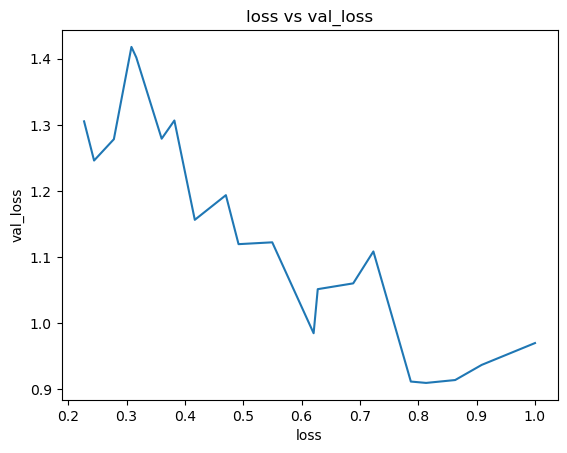

In [11]:
plt.plot(loss_list, val_loss_list, label='CPU')
plt.title('loss vs val_loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.show()

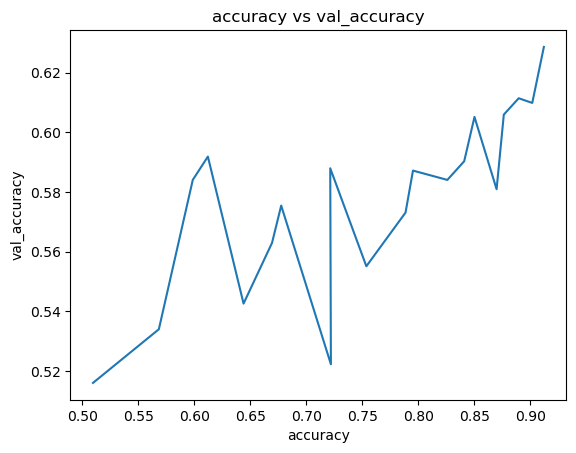

In [12]:
plt.plot(accuracy_list, val_accuracy_list, label='CPU')
plt.title('accuracy vs val_accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.show()

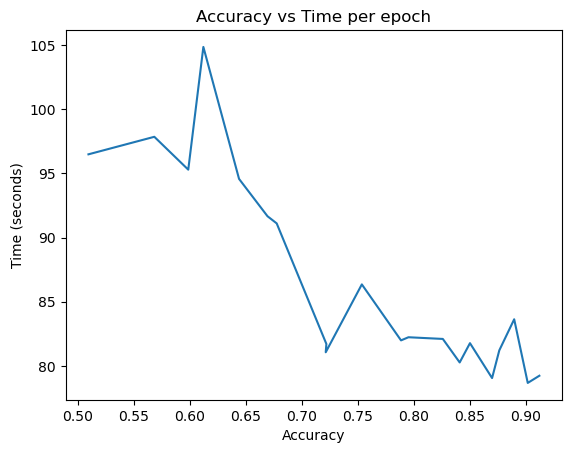

In [13]:
plt.plot(accuracy_list, time_list, label='CPU')
plt.title('Accuracy vs Time per epoch')
plt.ylabel('Time (seconds)')
plt.xlabel('Accuracy')
plt.show()

In [14]:
#plt.plot(time_list, accuracy_list, marker='o', linestyle='-')
#plt.title('Accuracy vs Time per epoch')
#plt.xlabel('Time (seconds)')
#plt.ylabel('Accuracy')
#plt.grid(True)
#plt.show()

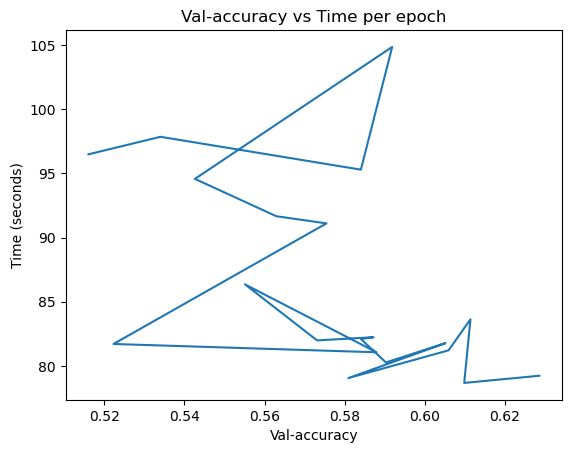

In [15]:
plt.plot(val_accuracy_list, time_list, label='CPU')
plt.title('Val-accuracy vs Time per epoch')
plt.ylabel('Time (seconds)')
plt.xlabel('Val-accuracy')
plt.show()